# Interactive Plotting and Monte Carlo simulations of CPPI

In [11]:
import ipywidgets as widgets 
from IPython.display import display
import pandas as pd
from sys import path 
path.append('../')
import edhec_risk_kit as erk
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GBM Interactive Plots

<Axes: >

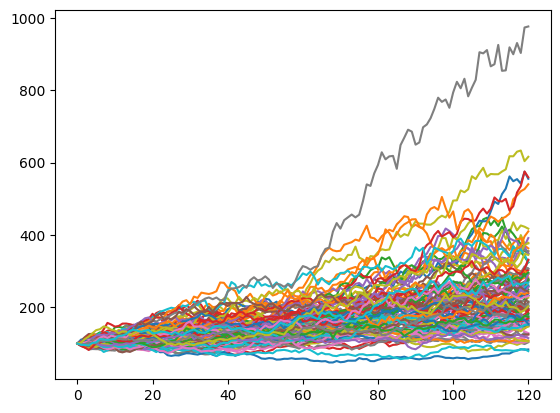

In [12]:
erk.gbm(10, 100, mu=0.1).plot(legend=False)

In [13]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under Geometric Brownian Motion model
    """

    s_0=100
    prices = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color='indianred', alpha=0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=s_0, ls=':', color='Black')
    ax.set_ylim(top=400)
    # draw a dot at the origin 
    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)

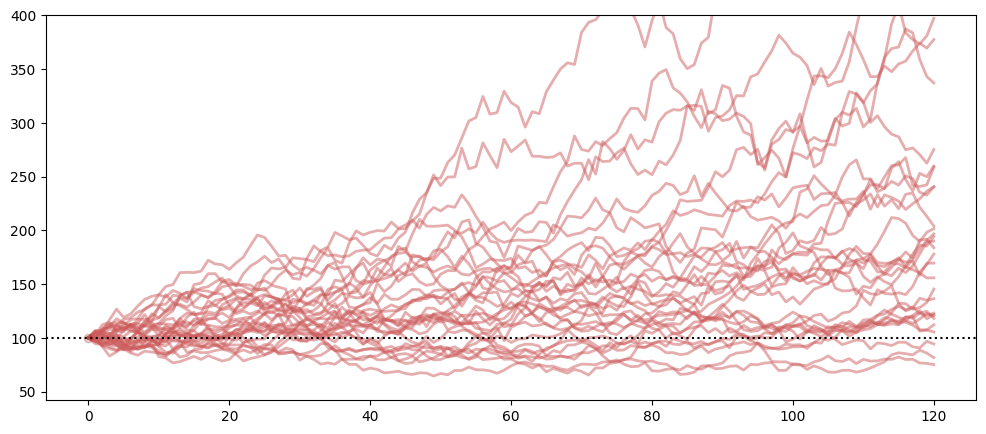

In [14]:
show_gbm(30, 0.07, 0.15)

In [15]:
gbm_controls = widgets.interactive(show_gbm, 
                                   n_scenarios = (1, 20, 1), # min, max, step size
                                   mu = (0, 0.2, 0.01),
                                   sigma = (0, .3, .01)
                                   )

In [16]:
# sigma increases the range of outcomes 
    # when zero - there is no volatility
gbm_controls

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.1, de…

## Interactive CPPI Simulation - Monte Carlo

In [21]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """

    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr['Wealth']
    y_max = wealth.values.max()*y_max/100  # used to help scale/zoom in
    ax = wealth.plot(legend=False, alpha=0.3, color='indianred', figsize=(12,6))
    ax.axhline(y=start, ls=':', color='black')
    ax.axhline(y=start*floor, ls='--', color='red')
    ax.set_ylim(top=y_max)

cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0., .30, .05),
                                    floor=(0, 2, .1),
                                    riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description='Zoom Y Axis'))


In [ ]:
# In the video the function gbm is not the lastes version provided by the instructor. 
# Here you can find the newest one that is isued in the following video.
def gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0, prices=True):
    """
    Evolution of Geometric Brownian Motion trajectories, such as for Stock Prices through Monte Carlo
    :param n_years:  The number of years to generate data for
    :param n_paths: The number of scenarios/trajectories
    :param mu: Annualized Drift, e.g. Market Return
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_paths columns and n_years*steps_per_year rows
    """
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year) + 1
    # the standard way ...
    # rets_plus_1 = np.random.normal(loc=mu*dt+1, scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    # without discretization error ...
    rets_plus_1 = np.random.normal(loc=(1+mu)**dt, scale=(sigma*np.sqrt(dt)), size=(n_steps, n_scenarios))
    rets_plus_1[0] = 1
    ret_val = s_0*pd.DataFrame(rets_plus_1).cumprod() if prices else rets_plus_1-1
    return ret_val

In [22]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

# Part 2 

In [25]:
import matplotlib.pyplot as plt

In [26]:
def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """

    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr['Wealth']
    y_max = wealth.values.max()*y_max/100  # used to help scale/zoom in
    terminal_wealth = wealth.iloc[-1]
    # Plot!
    # want to see distribution of terminal wealth 
        # put a histogram to the right of the chart above 
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios': [3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)

    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color='indianred')
    wealth_ax.axhline(y=start, ls=':', color='black')
    wealth_ax.axhline(y=start*floor, ls='--', color='red')
    wealth_ax.set_ylim(top=y_max)

    # terminal is like same wealth series, but just the last row 
    # ec = edge color 
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=':', color='black')


cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0., .30, .05),
                                    floor=(0, 2, .1),
                                    riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description='Zoom Y Axis'))

display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [36]:
import numpy as np

def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """

    start = 100
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr['Wealth']

    # calculate the terminal wealth stats 
    y_max = wealth.values.max()*y_max/100
    terminal_wealth = wealth.iloc[-1]

    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start*floor)  # np.less() when is terminal_wealth less than start*floor; true when violation, false when not
    n_failues = failure_mask.sum()  # count number of trues (summing true values 1)
    p_fail = n_failues/n_scenarios

    # expected shortfall: when there is a failure, what is the average failure extent (to what extent does it fail)
     # when floor is 80 and you have 75, then 5 is the amount of shortfall 
    # np.dot(): way of summing tv-start*floor by failure_mask and then summing it 
    # if n_failues == 0, then you get a divide by zero exception
    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failues if n_failues > 0 else 0.0

    # Plot!
    # want to see distribution of terminal wealth 
        # put a histogram to the right of the chart above 
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios': [3,2]}, figsize=(24,9))
    plt.subplots_adjust(wspace=0.0)

    wealth.plot(ax=wealth_ax, legend=False, alpha=0.3, color='indianred')
    wealth_ax.axhline(y=start, ls=':', color='black')
    wealth_ax.axhline(y=start*floor, ls='--', color='red')
    wealth_ax.set_ylim(top=y_max)

    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=':', color='black')
    hist_ax.axhline(y=tw_mean, ls=':', color='blue')
    hist_ax.axhline(y=tw_mean, ls=':', color='purple')
    hist_ax.annotate(f'Mean: ${int(tw_mean)}', xy=(.7, .9), xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f'Median: ${int(tw_median)}', xy=(.7, .85), xycoords='axes fraction', fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls='--', color='red', linewidth=3)
        hist_ax.annotate(f'Violations: {n_failues} ({p_fail*100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}', xy=(.7, .7), xycoords='axes fraction', fontsize=24)

cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0., +.2, .01),
                                    sigma=(0., .1, .5),
                                    floor=(0, 2, .1),
                                    riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description='Zoom Y Axis'),
                                    steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12, description='Rebals/Year')
                                    )
    
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [ ]:
# could do show_ef2 - create interactive chart as an exercise